Title: Email Domain Pie Chart

Author: Philip Cullen

Task: Create a notebook that should have a pie chart of peoples email domains in the csv file.

Note: 
- In this notebook, I include brief explanations of the code using comments marked with # inside the code boxes.
- I have also split the code into separate section to breakdown exactly what I am doing and how I approach the assignment.


Approach: 
- First load the data from the url https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download as a .csv file.
- Read the .csv file onto a pandas DataFrame.
- Extract the email domains.
- Count the number of domains used by each of the 1000 people.
- Make the pie chart.
 

1. Set up step
This section of code just covers library importing, loading the dataset, and reading it into a Dataframe

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# imports the required libraries

url = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"

# Reads the csv file into a pandas DataFrame
df = pd.read_csv(url)

# This piece of code just displays the first few rows to ensure the data has been loaded correctly
df.head()

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


The above has displayed the first few rows of data.
Therefore, it appears the data has been loaded correctly.

2. Extracting the Email Domains

From the previous step, we see the email addresses are in a column titled "Email"

Knowing this it makes it easier to extract specifically the email domains

In [18]:
# This line extracts the domain part of each email address and adds them to a data Frame called "Domain".
# It does this by splitting the email (string) before and after the @ .
# str[1] takes the second part/ the domain of each email address.

df["Domain"] = df["Email"].str.split("@").str[1]

# This just shows that the email domains were extracted successfully.
df["Domain"].head()

0    example.org
1    example.net
2    example.org
3    example.com
4    example.net
Name: Domain, dtype: object

Above we can see the domains in the .csv file.
However, while we know the domains we don't know how many are used for the 1000 people.

3. Counting the Domains

This step counts how many people use each of the domains.

In [ ]:
domain_counts = df['Domain'].value_counts()

domain_counts.head(10)

# This code creates a data frame for just the domains, but counts how much of each there is
# Having a total count for each is good as we know roughly what our piechart may look like

Domain
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64

4. Making the Pie Chart

This final setion has the code used to produce the pie chart.

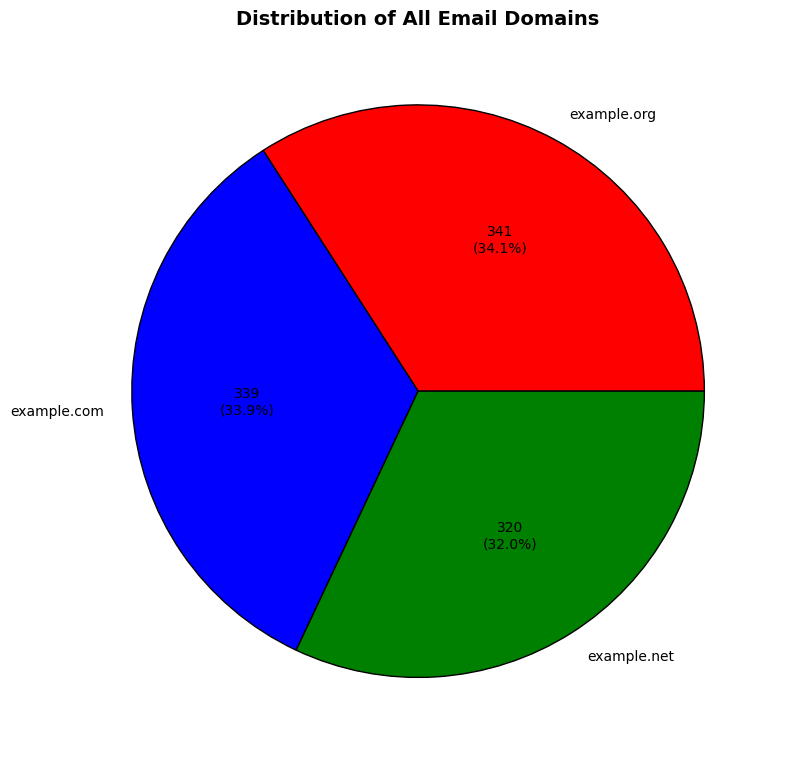

In [ ]:
plt.figure(figsize=(8,8))

# autopct shows both count and percentage
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{count}\n({pct:.1f}%)'
    return my_format

colours = ["red","Blue","Green"]
# Assigns the coulorurs for each slice of the pie chart

plt.pie(
    domain_counts,
    labels=domain_counts.index,
    autopct=autopct_format(domain_counts),
    colors=colours,
    wedgeprops={"edgecolor":"black"}
)

# labels = domain counts, uses the names from the domain_counts dataframe to label the pie chart
# autopct=domain_counts.index dunction customises what is shown on each s;ice based of the information in the domain_counts dataframe

plt.title("Distribution of All Email Domains", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()